In [4]:
import pandas as pd
import numpy as np
from windowing import GeneData
from network import GeneModel
pd.set_option('display.max_columns', 500)

data = pd.read_csv('data/22-23/player_data.csv')
data = data[data['minutes'] > 0].reset_index(drop=True)
gene = GeneData(data)

gene.reset_data()

gene.add_team_performance(window_size=20)

gene.position_filter('MID')
gene.window_split(window_size=6, tvt_size=[0.775, 0.2, 0.025])
gene.scale_data()
gene.wrangle_data()

gene_model = GeneModel(gene)

batch size: 3060
batch size: 790
batch size: 99


In [2]:
# pd.DataFrame(gene.train_data['target_data']).value_counts()

# # import matplotlib.pyplot as plt

# # plt.hist(gene.train_data['target_data'])

In [5]:
gene_model.train(epochs=50, batch_size=400, verbose=1)

Epoch 1/50
8/8 [==============================] - 2s 37ms/step - loss: 0.6881 - accuracy: 0.5533 - val_loss: 0.6556 - val_accuracy: 0.6873
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6370 - accuracy: 0.6608 - val_loss: 0.5897 - val_accuracy: 0.6873
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5932 - accuracy: 0.6608 - val_loss: 0.5521 - val_accuracy: 0.6873
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5567 - accuracy: 0.7023 - val_loss: 0.5218 - val_accuracy: 0.7380
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.5318 - accuracy: 0.7343 - val_loss: 0.5188 - val_accuracy: 0.7405
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5222 - accuracy: 0.7451 - val_loss: 0.5031 - val_accuracy: 0.7468
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.5133 - accuracy: 0.7588 - val_loss: 0.5023 - val_accuracy: 0.7519
Epoch 8/50
8/8 [============

In [6]:
y_test = gene.test_data['target_data']

test_data = [gene.test_data['match_data'], gene.test_data['player_data']]

accuracy = gene_model.model.evaluate(
    test_data, y_test, batch_size=500, verbose=1)


y_test = y_test.reshape(-1,1)
preds = gene_model.model.predict(test_data).reshape(1, -1)[0]

accuracy

4/4 [==============================] - 0s 2ms/step


[0.4654301106929779, 0.7575757503509521]

In [9]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print(mean_squared_error(y_test, preds, squared=True))

mean_squared_error(y_test,np.roll(y_test, 1), squared=True)

mean_squared_error(y_test,np.ones(len(y_test)), squared=True)

0.15081106


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

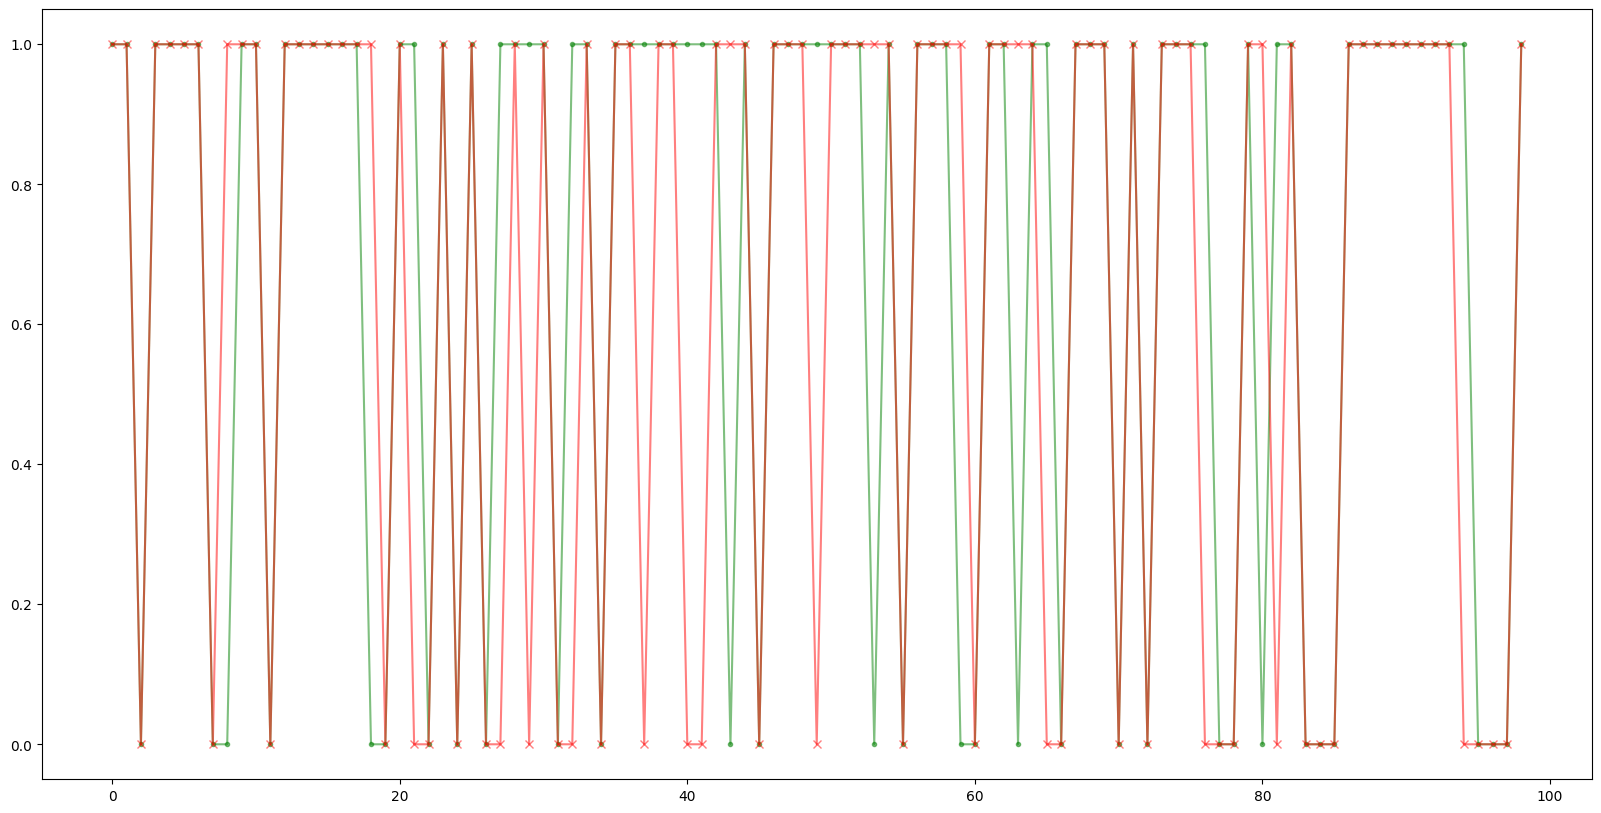

In [10]:

def moving_average(a, n=0) :
    ret = np.cumsum(np.abs(a), dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.figure(figsize=(20,10))

# plt.plot(moving_average(np.roll(y_test, 1)-y_test), 'b', marker='.')
# plt.plot(moving_average(preds-y_test), 'r', alpha=0.5)
# plt.plot(moving_average(y_test-y_test), 'r', alpha=0.5)

# plt.plot(moving_average(np.roll(y_test, 2)), 'b', marker='.')
# plt.plot(moving_average(preds), 'g', alpha=0.5, marker='.')
# plt.plot(moving_average(y_test), 'r', alpha=0.5, marker='x')

plt.plot(preds > 0.5, 'g', alpha=0.5, marker='.')
plt.plot(y_test, 'r', alpha=0.5, marker='x')

In [24]:
gene.raw_data.loc[gene.test_indices[i][0]]

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out,position,player_name_short,player_name_full,team_h,team_a,team_h_difficulty,team_a_difficulty,team_h_name,team_a_name,player_team,time_diffs
5653,301,111,1,13,False,2023-02-15 19:30:00+00:00,1,3,23,86,1,1,0,1,0,0,0,0,0,0,3,42,54.2,28.1,9.0,9.1,1,0.21,0.20,0.41,1.45,124,132984,4064729,271735,138751,MID,De Bruyne,Kevin De Bruyne,1,13,5,4,Arsenal,Man City,13,75.0
5654,301,238,16,2,False,2023-02-18 15:00:00+00:00,1,1,24,87,0,0,0,1,0,0,0,0,0,0,0,17,10.8,66.7,18.0,9.6,1,0.31,0.71,1.02,0.98,124,-24065,4044351,79461,103526,MID,De Bruyne,Kevin De Bruyne,16,13,5,2,Nott'm Forest,Man City,13,67.5
5655,301,257,15,3,True,2023-03-04 12:30:00+00:00,2,0,26,64,0,0,1,0,0,0,0,0,0,0,0,12,12.0,40.8,7.0,6.0,1,0.16,0.35,0.51,0.40,122,-148865,3253074,45201,194066,MID,De Bruyne,Kevin De Bruyne,13,15,3,5,Man City,Newcastle,13,333.5
5656,301,262,7,1,False,2023-03-11 17:30:00+00:00,0,1,27,11,0,0,0,0,0,0,0,0,0,0,0,5,3.4,0.3,0.0,0.4,0,0.00,0.00,0.00,0.09,121,-260819,2993128,9452,270271,MID,De Bruyne,Kevin De Bruyne,7,13,5,2,Crystal Palace,Man City,13,173.0
5657,301,287,12,13,True,2023-04-01 11:30:00+00:00,4,1,29,90,1,1,0,1,0,0,0,0,0,0,3,52,73.2,67.0,25.0,16.5,1,0.84,0.63,1.47,0.33,120,-55287,2700894,40545,95832,MID,De Bruyne,Kevin De Bruyne,13,12,4,5,Man City,Liverpool,13,498.0


In [25]:
gene.raw_data.loc[gene.test_indices[i][1]]

element                                             301
fixture                                             298
opponent_team                                        17
total_points                                          9
was_home                                          False
kickoff_time                  2023-04-08 16:30:00+00:00
team_h_score                                          1
team_a_score                                          4
round                                                30
minutes                                              90
goals_scored                                          0
assists                                               2
clean_sheets                                          0
goals_conceded                                        1
own_goals                                             0
penalties_saved                                       0
penalties_missed                                      0
yellow_cards                                    

In [23]:
i = 18

print(y_test[i][0])

print(preds[i])

9.0
7.160225
